In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("NIFTY 50 - Minute data.csv")
df = df.tail(1500)
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [4]:
df

,date,open,high,low,close,volume
835257,2024-01-20 09:15:00,21706.15,21720.30,21682.65,21715.90,0
835258,2024-01-20 09:16:00,21710.55,21717.00,21710.55,21714.25,0
835259,2024-01-20 09:17:00,21713.45,21713.45,21695.65,21697.75,0
835260,2024-01-20 09:18:00,21697.40,21698.00,21666.20,21686.30,0
835261,2024-01-20 09:19:00,21687.15,21706.00,21684.10,21704.60,0
...,...,...,...,...,...,...
836752,2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,0
836753,2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,0
836754,2024-01-25 15:27:00,21384.75,21401.75,21381.30,21394.15,0
836755,2024-01-25 15:28:00,21392.70,21396.25,21384.25,21395.70,0


In [5]:
df.set_index('date',inplace = True)

In [6]:
df

,open,high,low,close,volume
date,,,,,
2024-01-20 09:15:00,21706.15,21720.30,21682.65,21715.90,0
2024-01-20 09:16:00,21710.55,21717.00,21710.55,21714.25,0
2024-01-20 09:17:00,21713.45,21713.45,21695.65,21697.75,0
2024-01-20 09:18:00,21697.40,21698.00,21666.20,21686.30,0
2024-01-20 09:19:00,21687.15,21706.00,21684.10,21704.60,0
...,...,...,...,...,...
2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,0
2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,0
2024-01-25 15:27:00,21384.75,21401.75,21381.30,21394.15,0


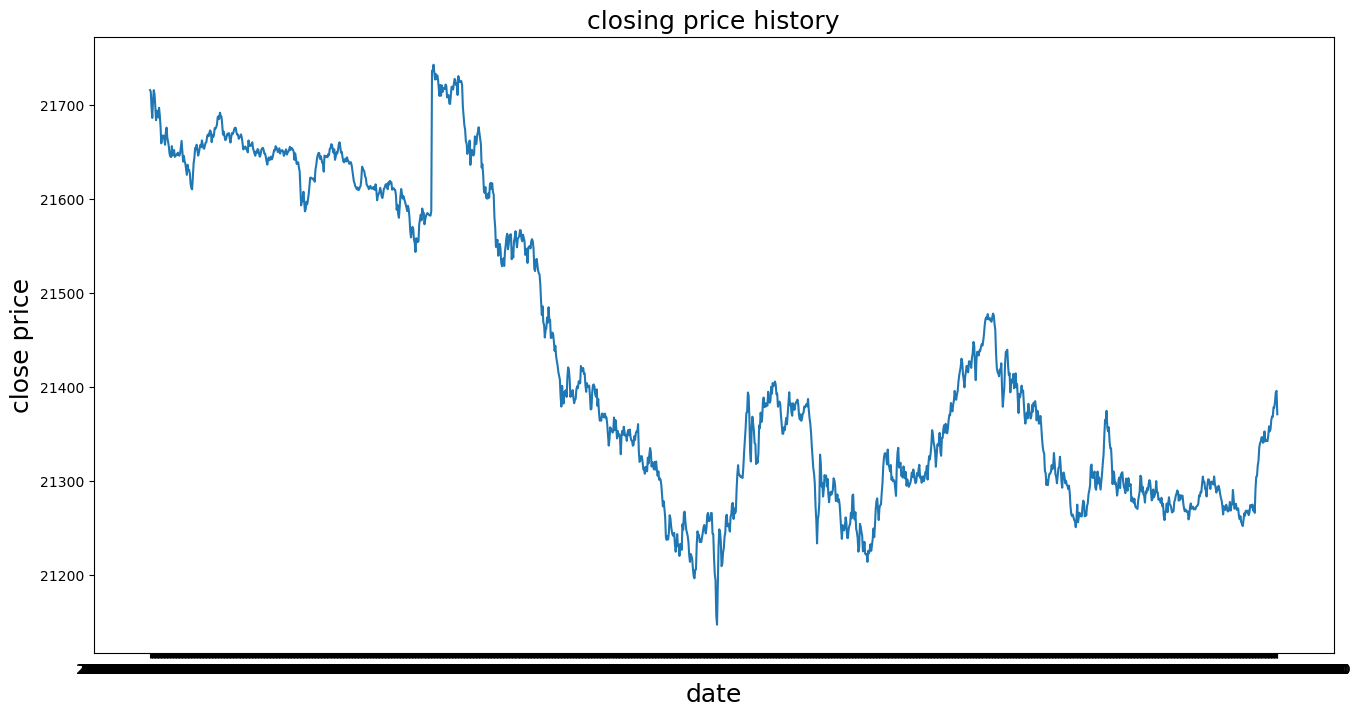

In [7]:
plt.figure(figsize=(16,8))
plt.title('closing price history', fontsize=18)
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(df['close'])
plt.show()

In [8]:
def SMA(data, period, column='close'):
    return df[column].rolling(window=period).mean()

In [9]:
df['SMA100'] = SMA(df,100)
df['SMA20'] = SMA(df,20)

In [10]:
len(df)

1500

In [25]:
position = 'out'
signals = ["Hold"]


In [26]:

for i in range(1, len(df)):
    if df['SMA20'][i] > df['SMA100'][i] and df['SMA20'][i - 1] <= df['SMA100'][i - 1]:
        signals.append("Buy")
        if position == "out" or position == "sell":
            position = "buy"
        elif position == "buy":
            position = "hold"
    elif df['SMA20'][i] < df['SMA100'][i] and df['SMA20'][i - 1] >= df['SMA100'][i - 1]:
        signals.append("Sell")
        if position == "out" or position == "buy":
            position = "sell"
        elif position == "sell":
            position = "hold"
    else:
        signals.append("Hold")
df['Signals'] = signals

In [27]:
df

,open,high,low,close,volume,SMA100,SMA20,Signals
date,,,,,,,,
2024-01-20 09:15:00,21706.15,21720.30,21682.65,21715.90,0,NaN,NaN,Hold
2024-01-20 09:16:00,21710.55,21717.00,21710.55,21714.25,0,NaN,NaN,Hold
2024-01-20 09:17:00,21713.45,21713.45,21695.65,21697.75,0,NaN,NaN,Hold
2024-01-20 09:18:00,21697.40,21698.00,21666.20,21686.30,0,NaN,NaN,Hold
2024-01-20 09:19:00,21687.15,21706.00,21684.10,21704.60,0,NaN,NaN,Hold
...,...,...,...,...,...,...,...,...
2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,0,21295.4370,21352.4525,Hold
2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,0,21296.4465,21354.6700,Hold
2024-01-25 15:27:00,21384.75,21401.75,21381.30,21394.15,0,21297.5055,21357.2975,Hold


In [34]:
df['Buy'] = np.where(df['Signals'] == 'Buy',df['close'],np.NaN)
df['Sell'] = np.where(df['Signals'] == 'Sell',df['close'],np.NaN)

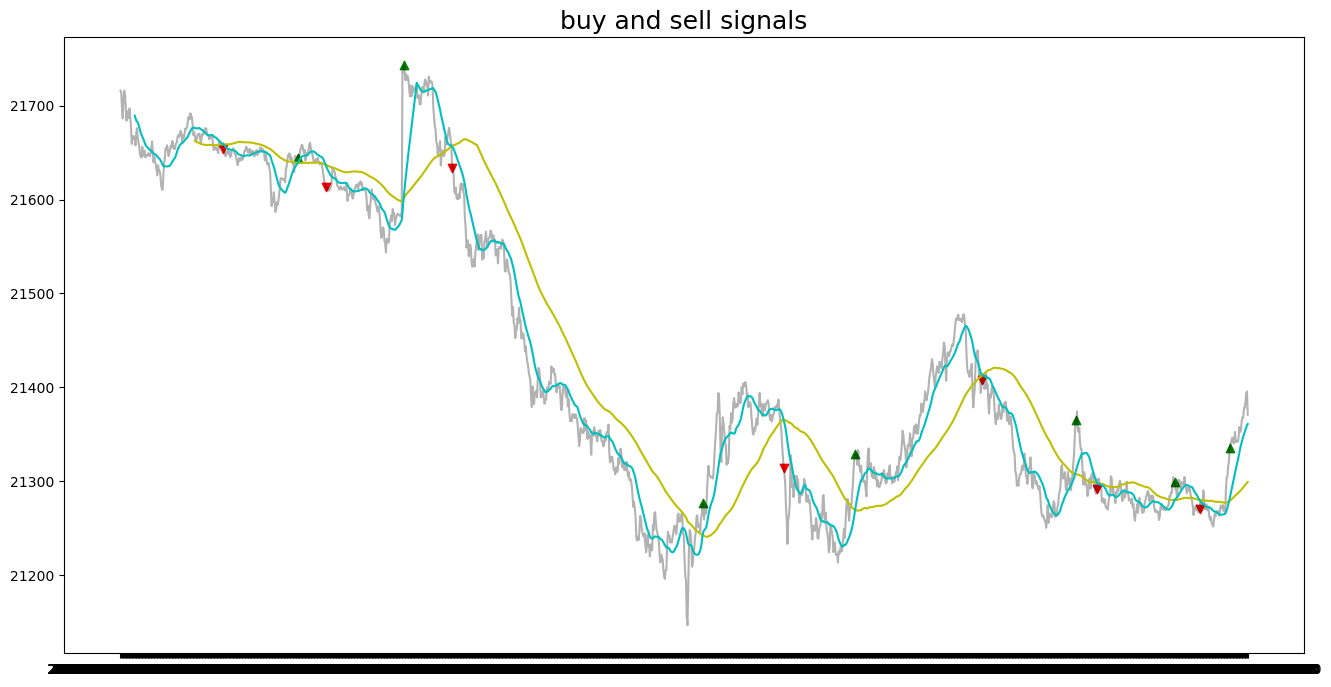

In [38]:
plt.figure(figsize=(16,8))
plt.title("buy and sell signals",fontsize=18)
plt.plot(df['close'],color = 'k',alpha = .3)
plt.plot(df['SMA100'],color='y')
plt.plot(df['SMA20'],color='c')
plt.scatter(df.index,df['Buy'],label='Buy signal', marker='^',color='green')
plt.scatter(df.index,df['Sell'],marker='v',color='red')
plt.show()

In [39]:
df

,open,high,low,close,volume,SMA100,SMA20,Signals,Buy,Sell
date,,,,,,,,,,
2024-01-20 09:15:00,21706.15,21720.30,21682.65,21715.90,0,NaN,NaN,Hold,NaN,NaN
2024-01-20 09:16:00,21710.55,21717.00,21710.55,21714.25,0,NaN,NaN,Hold,NaN,NaN
2024-01-20 09:17:00,21713.45,21713.45,21695.65,21697.75,0,NaN,NaN,Hold,NaN,NaN
2024-01-20 09:18:00,21697.40,21698.00,21666.20,21686.30,0,NaN,NaN,Hold,NaN,NaN
2024-01-20 09:19:00,21687.15,21706.00,21684.10,21704.60,0,NaN,NaN,Hold,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,0,21295.4370,21352.4525,Hold,NaN,NaN
2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,0,21296.4465,21354.6700,Hold,NaN,NaN
2024-01-25 15:27:00,21384.75,21401.75,21381.30,21394.15,0,21297.5055,21357.2975,Hold,NaN,NaN


In [41]:
money = 0
for i in range(1,len(df)):
    if df['Signals'][i] == 'Buy':
        money -= df['close'][i]
    elif df['Signals'][i] == 'Sell':
        money += df['close'][i]
print(money)

193.24999999999636
